### Fetch all problems and set solved dates

In [1]:
from calls import get_problems
problems = await get_problems()

Getting submissions for ransom-note
Getting submissions for diameter-of-binary-tree
Getting submissions for word-ladder
Getting submissions for minimum-height-trees
Getting submissions for validate-binary-search-tree
Getting submissions for invert-binary-tree
Getting submissions for balanced-binary-tree
Getting submissions for lowest-common-ancestor-of-a-binary-search-tree
Getting submissions for course-schedule
Getting submissions for number-of-islands
Getting submissions for 01-matrix
Getting submissions for rotting-oranges
Getting submissions for clone-graph
Getting submissions for longest-palindromic-substring
Getting submissions for search-in-rotated-sorted-array
Getting submissions for find-all-anagrams-in-a-string
Getting submissions for binary-search
Getting submissions for time-based-key-value-store
Getting submissions for minimum-window-substring
Getting submissions for longest-substring-without-repeating-characters
Getting submissions for valid-palindrome
Getting submissions

### Retrive solved dates and sort

In [2]:
solved_dates_difficulty = [(problem.solved_date, problem.difficulty) for problem in problems if problem.solved_date]

# Sort by dates
solved_dates_difficulty.sort(key=lambda x: x[0])

solved_dates = [t[0] for t in solved_dates_difficulty]
difficulties = [t[1] for t in solved_dates_difficulty]
print(difficulties)

# Create cumulative count
cumulative_counts = list(range(1, len(solved_dates) + 1))

[<Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.EASY: 'EASY'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.EASY: 'EASY'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.EASY: 'EASY'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.EASY: 'EASY'>, <Difficulty.EASY: 'EASY'>, <Difficulty.EASY: 'EASY'>, <Difficulty.EASY: 'EASY'>, <Difficulty.EASY: 'EASY'>, <Difficulty.EASY: 'EASY'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.EASY: 'EASY'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.MEDIUM: 'MEDIUM'>, <Difficulty.EASY: 'EASY'>, <Difficulty.EASY: 'E

### Chart number of problems over time

(array([18628., 18809., 18993., 19174., 19358., 19539., 19723., 19905.,
        20089.]),
 [Text(18628.0, 0, '2021-01'),
  Text(18809.0, 0, '2021-07'),
  Text(18993.0, 0, '2022-01'),
  Text(19174.0, 0, '2022-07'),
  Text(19358.0, 0, '2023-01'),
  Text(19539.0, 0, '2023-07'),
  Text(19723.0, 0, '2024-01'),
  Text(19905.0, 0, '2024-07'),
  Text(20089.0, 0, '2025-01')])

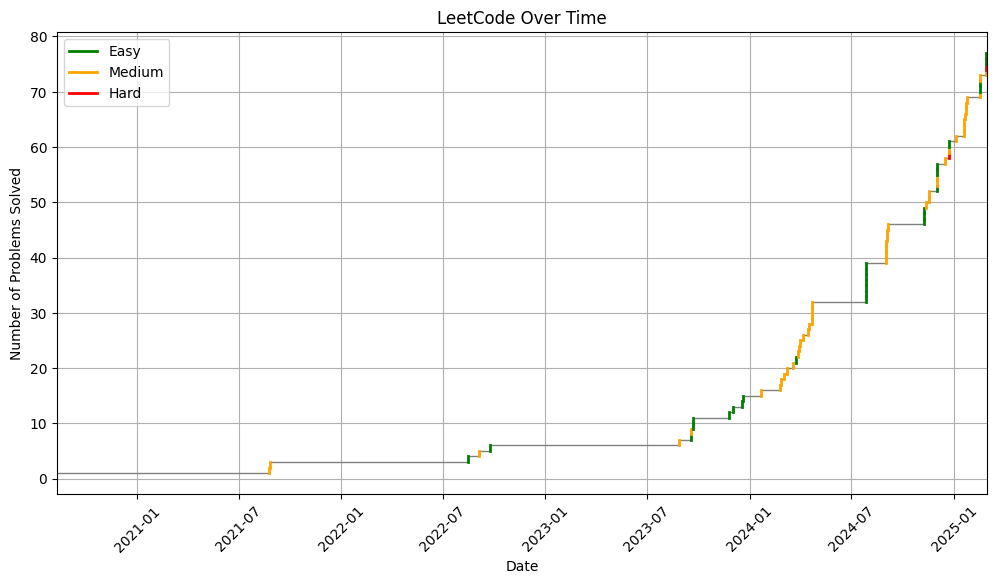

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from datetime import datetime

from models.enums import Difficulty

# set date range
start_date = None # example: datetime(2024, 1, 1)
end_date = None # example: datetime(2025, 1, 1)

# default dates
if not start_date: start_date = solved_dates[0]
if not end_date: end_date = datetime.now()

plt.figure(figsize=(12, 6))

# Colormap for difficulties
difficulty_colors = {
    Difficulty.EASY: 'green',
    Difficulty.MEDIUM: 'orange',
    Difficulty.HARD: 'red'
}

plt.step(solved_dates, cumulative_counts, where='post', color='gray', linewidth=1)

# Plot colored vertical lines at each step
for i in range(len(solved_dates) - 1):
    if cumulative_counts[i] != cumulative_counts[i+1]:  # Only if there's a vertical segment
        plt.plot([solved_dates[i+1], solved_dates[i+1]], 
                [cumulative_counts[i], cumulative_counts[i+1]], 
                color=difficulty_colors[difficulties[i+1]], 
                linewidth=2)
    
legend_elements = [
    Line2D([0], [0], color='green', lw=2, label='Easy'),
    Line2D([0], [0], color='orange', lw=2, label='Medium'),
    Line2D([0], [0], color='red', lw=2, label='Hard')
]
plt.legend(handles=legend_elements)

plt.title('LeetCode Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Problems Solved')
plt.grid(True)
plt.xlim(start_date, end_date)

plt.xticks(rotation=45)